In [1]:
%run start.py

#### 데이터 읽기

In [5]:
uselog = pd.read_csv('data/use_log.csv')
print(len(uselog))
uselog.head(2)

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01


In [9]:
customer = pd.read_csv('data/customer_master2.csv')
print(len(customer))
customer.head(2)

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


In [11]:
class_master = pd.read_csv('data/class_master.csv')
print(len(class_master))
class_master.head(2)

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500


In [13]:
campaign_master = pd.read_csv('data/campaign_master.csv')
print(len(campaign_master))
campaign_master.head(2)

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인


#### 고객 데이터 가공

In [16]:
## customer 와  class_master 를 결합
customer_join1 = pd.merge(customer,class_master, on="class", how="left")
customer_join1.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000


In [22]:
## customer_join1 과 campaign_master를 결합
customer_join2 = pd.merge(customer_join1, campaign_master, on="campaign_id", how="left")
customer_join2.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [24]:
customer_join2.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

###  회원권별 카운트

In [29]:
customer_join2.groupby("class_name")[["customer_id"]].count()

,customer_id
class_name,
0_종일,2045
1_주간,1019
2_야간,1128


In [33]:
customer_join2.groupby("class_name")[["is_deleted","price"]].sum()

,is_deleted,price
class_name,,
0_종일,664,21472500
1_주간,344,7642500
2_야간,342,6768000


In [43]:
customer_join2.groupby("campaign_name")[["customer_id"]].count()

,customer_id
campaign_name,
0_입회비반액할인,650
1_입회비무료,492
2_일반,3050


In [37]:
customer_join2.groupby("gender")[["customer_id"]].count()

,customer_id
gender,
F,1983
M,2209


In [45]:
customer_join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 360.4+ KB


#### 최근 고객 데이터

In [48]:
customer_join2["end_date"] = pd.to_datetime(customer_join2["end_date"])
customer_join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   object        
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 360.4+ KB


In [54]:
#customer_new = customer_join2.loc[(customer_join2["end_date"].isna()) | (customer_join2["end_data"] >= pd.to_datetime("20190331") )]
customer_new = customer_join2.loc[ (customer_join2["end_date"].isna() ) | 
                                          (customer_join2["end_date"]>= pd.to_datetime("20190331")) ]
print(len(customer_new))
customer_new.head()
      

2953


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반


In [56]:
### 현재 이용 중인 회원 중 class_name별 카운트
customer_new.groupby("class_name")[["customer_id"]].count()

,customer_id
class_name,
0_종일,1444
1_주간,696
2_야간,813


#### 이용 이력 데이터 (uselog)

In [59]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [65]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.5+ MB


In [69]:
uselog["년월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [71]:
uselog.groupby("년월")[['log_id']].count()

,log_id
년월,
201804,16460
201805,16913
201806,16994
201807,16954
201808,16674
201809,16471
201810,15989
201811,15697
201812,16383


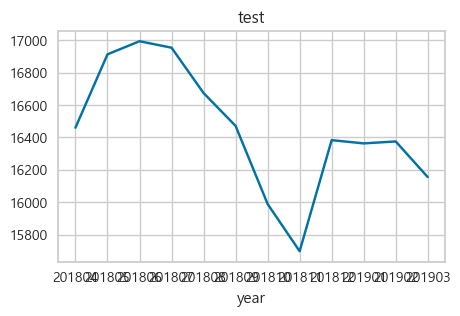

In [83]:
plt.figure(figsize=(5,3))
plt.plot(uselog.groupby("년월")[['log_id']].count())
plt.title("test")
plt.xlabel("year")
plt.show()

In [85]:
uselog_months = uselog.groupby(["년월","customer_id"],as_index=False)["usedate"].count()
uselog_months

,년월,customer_id,usedate
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [87]:
uselog_months.rename(columns={"usedate":"count"},inplace=True)
uselog_months

,년월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [103]:
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min" ])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer
# 'customer_id'로 그룹화하고, 'count' 컬럼에 대해 'mean', 'median', 'max', 'min'을 계산
## 월별 각 회원의 이용횟수에 대한 값들

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


#### uselog 데이터로 정기이용 여부 플래그 작성

In [106]:
uselog

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [108]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [124]:
uselog_weekday = uselog.groupby(["customer_id","년월","weekday"],as_index=False).count()[["customer_id","년월","weekday","log_id"]]
uselog_weekday

,customer_id,년월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [126]:
uselog_weekday.rename(columns={"log_id":"count"},inplace=True)
uselog_weekday

,customer_id,년월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [128]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [132]:
uselog_weekday["routine_flg"] = 0
uselog_weekday.loc[uselog_weekday["count"] >= 4, "routine_flg"] = 1
uselog_weekday.head()

,customer_id,count,routine_flg,rootine_flg
0,AS002855,5,1,1.0
1,AS008805,4,1,1.0
2,AS009013,2,0,NaN
3,AS009373,5,1,1.0
4,AS015233,5,1,1.0


In [144]:
uselog_weekday.head()

,customer_id,count,routine_flg,rootine_flg
0,AS002855,5,1,1.0
1,AS008805,4,1,1.0
2,AS009013,2,0,NaN
3,AS009373,5,1,1.0
4,AS015233,5,1,1.0


#### 고객 데이터와 이용이력 데이터를 결합

In [147]:
uselog_customer.head(2)
customer_join2.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


In [149]:
customer_join3 = pd.merge(customer_join2, uselog_customer, on="customer_id", how="left")
customer_join3.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3


In [151]:
customer_join4 = pd.merge(customer_join3,uselog_weekday[["customer_id", "routine_flg"]],
                                                                      on="customer_id", how="left")
customer_join4["start_date"]=pd.to_datetime(customer_join4["start_date"])
customer_join4.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [153]:
customer_join4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
 11  mean           4192 non-null   float64       
 12  median         4192 non-null   float64       
 13  max            4192 non-null   int64         
 14  min            4192 non-null   int64         
 15  routine_flg    4192 n

#### 회원기간 계산

In [158]:
from dateutil.relativedelta import relativedelta

In [160]:
a = relativedelta(pd.to_datetime("2025-03-30"),pd.to_datetime("2000-11-13"))
a

relativedelta(years=+24, months=+4, days=+17)

In [164]:
a.years

24

In [166]:
customer_join4["calc_date"] =customer_join4["end_date"]
customer_join4["calc_date"] = customer_join4["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join4

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30


In [170]:
customer_join4["membership_p"] = 0
for i in range(len(customer_join4)):
    delta = relativedelta( customer_join4.loc[i, "calc_date"], customer_join4.loc[i, "start_date"] )
    customer_join4.loc[i, "membership_p"] = delta.years*12 + delta.months  ## 개월 수 계산
customer_join4.head()


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_p
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [172]:
customer_join4[["mean","median","max","min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [176]:
customer_join4.groupby("routine_flg").count()[["customer_id"]]

,customer_id
routine_flg,
0,779
1,3413


In [182]:
customer_end = customer_join4.loc[customer_join4["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_p
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [184]:
customer_stay = customer_join4.loc[customer_join4["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_p
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [186]:
customer_join4.to_csv("data/customer_join4.csv", index=False, encoding="utf-8-sig")